# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_proper = city.title()
    city_url = f"{url}weather?q={city_proper}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | keflavik
Processing Record 3 of Set 1 | sosnogorsk
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | llorente
Processing Record 6 of Set 1 | masterton
Processing Record 7 of Set 1 | montilla
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | kangding
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | kabalo
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | happy valley-goose bay
Processing Record 20 of Set 1 | chadron
Processing Record 21 of Set 1 | waitangi
Processing R

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data = city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,26.73,83,100,2.06,US,1726544751
1,keflavik,64.0049,-22.5624,9.24,93,75,5.14,IS,1726544753
2,sosnogorsk,63.6023,53.8817,15.82,77,13,3.27,RU,1726544754
3,hamilton,39.1834,-84.5333,21.69,55,0,0.00,US,1726544755
4,llorente,11.4119,125.5458,26.88,84,100,4.17,PH,1726544756


In [93]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,26.73,83,100,2.06,US,1726544751
1,keflavik,64.0049,-22.5624,9.24,93,75,5.14,IS,1726544753
2,sosnogorsk,63.6023,53.8817,15.82,77,13,3.27,RU,1726544754
3,hamilton,39.1834,-84.5333,21.69,55,0,0.00,US,1726544755
4,llorente,11.4119,125.5458,26.88,84,100,4.17,PH,1726544756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [95]:
#Verify columns in dataframe
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


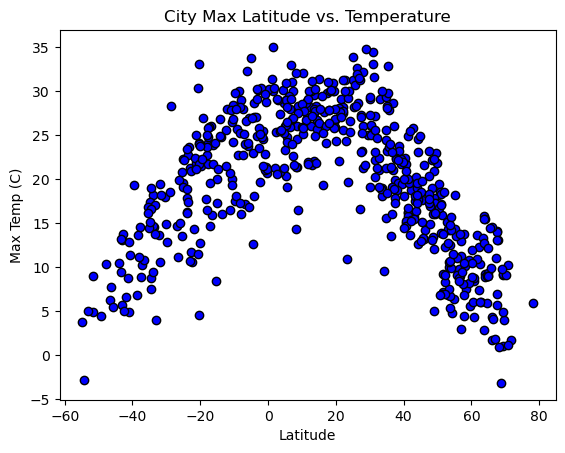

In [96]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], 
            color='blue', 
            marker='o', 
            edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature'),
plt.xlabel('Latitude'),
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

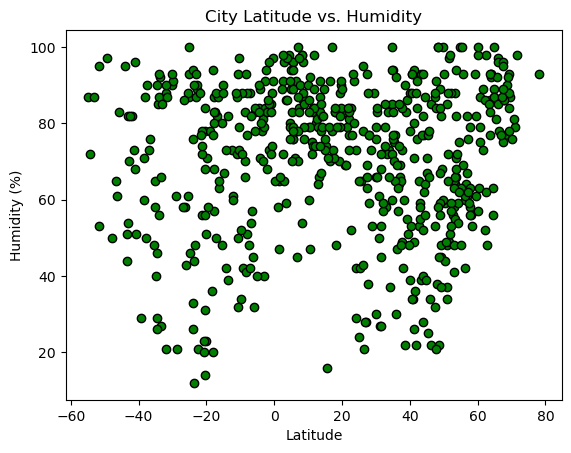

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'], 
            color='green', 
            marker='o', 
            edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity'),
plt.xlabel('Latitude'),
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

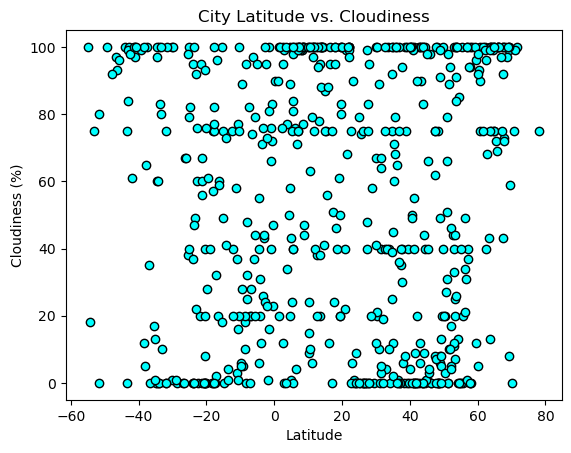

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'], 
            color='cyan', 
            marker='o', 
            edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness'),
plt.xlabel('Latitude'),
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

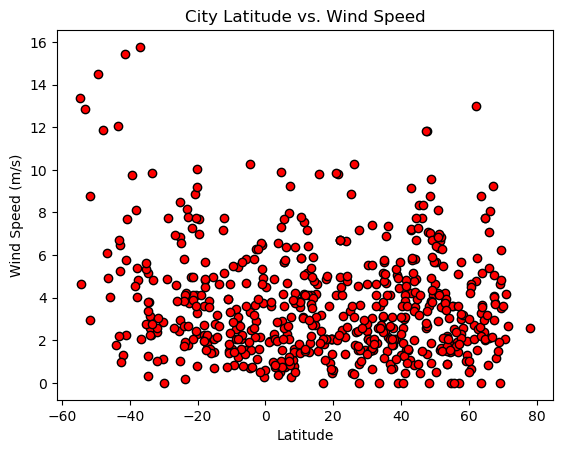

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'], 
            color='red', 
            marker='o', 
            edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed'),
plt.xlabel('Latitude'),
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


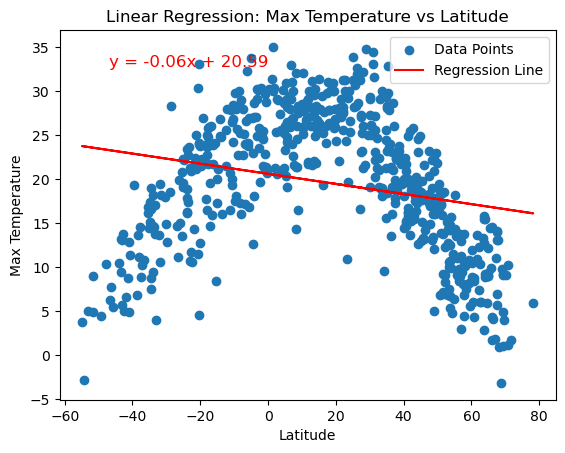

The r^2-value is: -0.2333977850211292


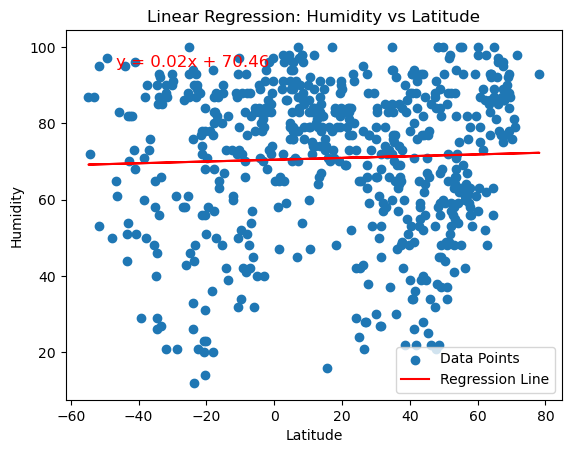

The r^2-value is: 0.03739126802195833


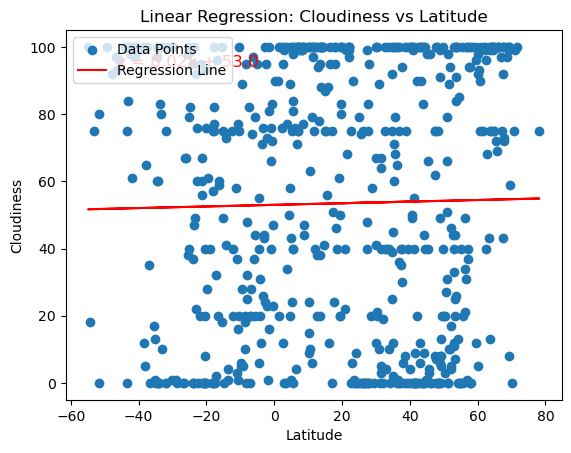

The r^2-value is: 0.019688385072598992


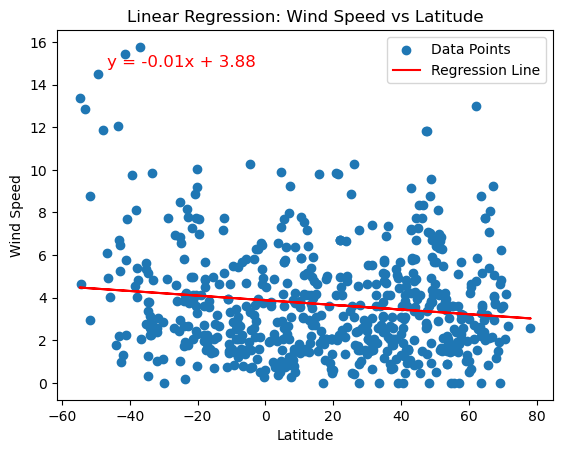

The r^2-value is: -0.13651167447821447


(-0.010897571942688785,
 3.8799349999091897,
 -0.13651167447821447,
 0.0008253614685206522,
 0.0032420271974087766)

In [100]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        regress_values = slope * x_values + intercept
        plt.scatter(x_values, y_values, label='Data Points')
        plt.plot(x_values, regress_values, color='red', label='Regression Line')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'Linear Regression: {y_label} vs {x_label}')
        plt.legend()
        plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', 
                xy=(0.1, 0.9), 
                xycoords='axes fraction', 
                fontsize=12, 
                color='red')
        plt.show()
        print(f"The r^2-value is: {r_value}")
        return slope, intercept, r_value, p_value, std_err

# Create regression values'
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed')



In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
def northern_hemi_df(weather_data):
    return weather_data[weather_data['Lat'] >= 0]

# Call the function to get the Northern Hemisphere data
northern_hemisphere_data = northern_hemi_df(city_data_df)

# Display sample data
print(northern_hemisphere_data.head())

                           City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0        hawaiian paradise park  19.5933 -154.9731     26.73        83   
1                      keflavik  64.0049  -22.5624      9.24        93   
2                    sosnogorsk  63.6023   53.8817     15.82        77   
3                      hamilton  39.1834  -84.5333     21.69        55   
4                      llorente  11.4119  125.5458     26.88        84   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        2.06      US  1726544751  
1                75        5.14      IS  1726544753  
2                13        3.27      RU  1726544754  
3                 0        0.00      US  1726544755  
4               100        4.17      PH  1726544756  


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
def southern_hemi_df(weather_data):
    return weather_data[weather_data['Lat'] <= 0]

# Call the function to get the Northern Hemisphere data
southern_hemisphere_data = southern_hemi_df(city_data_df)

# Display sample data
print(southern_hemisphere_data.head())


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
5                masterton -40.9597  175.6575      4.89        96         100   
8                adamstown -25.0660 -130.1015     19.55        87         100   
9             invercargill -46.4000  168.3500      7.79        61          93   
11       port-aux-francais -49.3500   70.2167      4.43        97         100   
14                  kabalo  -6.0500   26.9167     23.78        32          37   

         Wind Speed Country        Date  
City_ID                                  
5              5.75      NZ  1726544757  
8              8.50      PN  1726544761  
9              4.92      NZ  1726544762  
11            14.51      TF  1726544766  
14             1.53      CD  1726544769  


###  Temperature vs. Latitude Linear Regression Plot

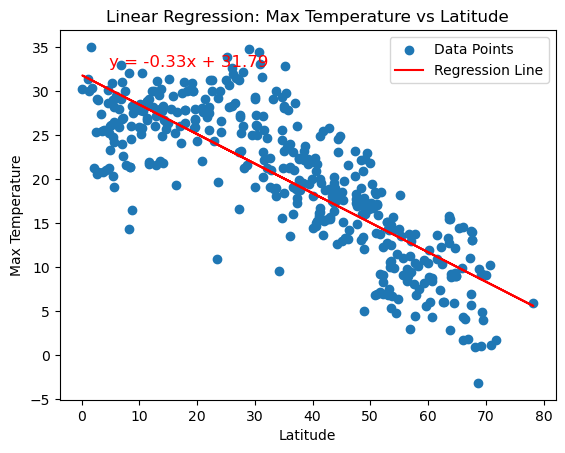

The r^2-value is: -0.8145727299157085


(-0.3349887365156698,
 31.793757123519157,
 -0.8145727299157085,
 8.814784253652475e-99,
 0.011795400085514576)

In [103]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_data['Lat'], northern_hemisphere_data['Max Temp'], 'Latitude', 'Max Temperature')


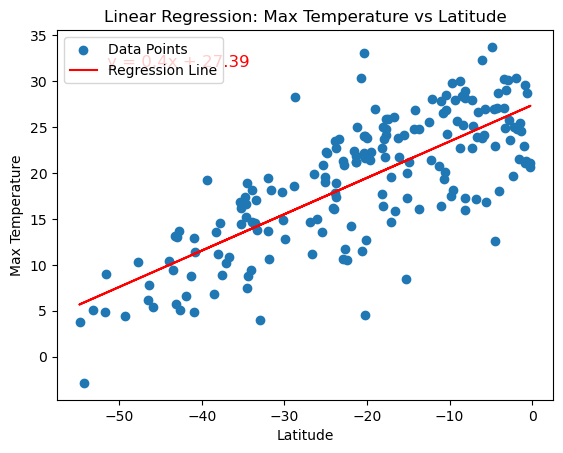

The r^2-value is: 0.7628299932562264


(0.39596186527001453,
 27.38801101943873,
 0.7628299932562264,
 1.1008028837053617e-36,
 0.024742967687008725)

In [104]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_data['Lat'], southern_hemisphere_data['Max Temp'], 'Latitude', 'Max Temperature')


**Discussion about the linear relationship:** 
As expected, the regression line shows that the closer the city is to 0 latitude the warmer the temperature becomes. This is true of both hemispheres. While there is more data to support this in the northern hemisphere than the southern hemisphere, the similarity in the r value for both hemispheres also supports the findings. 

### Humidity vs. Latitude Linear Regression Plot

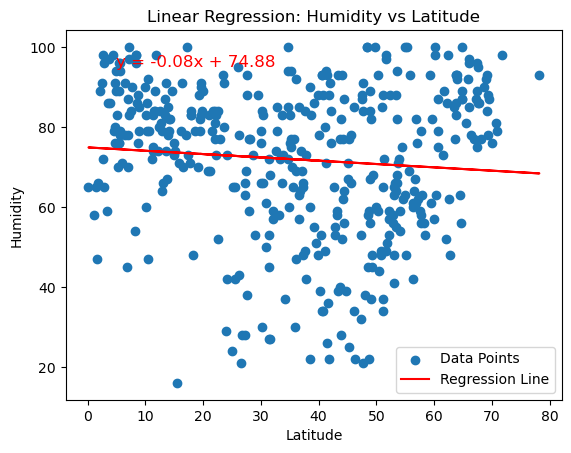

The r^2-value is: -0.08666823488974466


(-0.08305161046429498,
 74.8759013730941,
 -0.08666823488974466,
 0.07926117889046405,
 0.04720513238016472)

In [105]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_data['Lat'], northern_hemisphere_data['Humidity'], 'Latitude', 'Humidity')

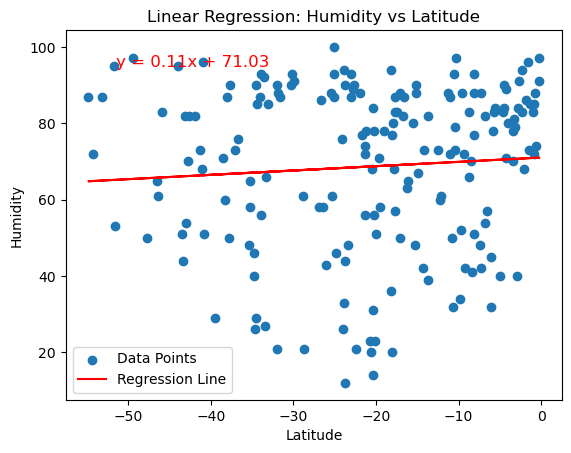

The r^2-value is: 0.072885325421432


(0.11339884156855022,
 71.03230829165241,
 0.072885325421432,
 0.3228403383104558,
 0.11439393240546776)

In [107]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_data['Lat'], southern_hemisphere_data['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** 
When it comes to the humidity in relation to latitude, there does not appear to be any relation. Both r values are below .1 which indicates a very poor relation to the regression line. It appears that cities both close to and far from the 0 latitude line can have high levels of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

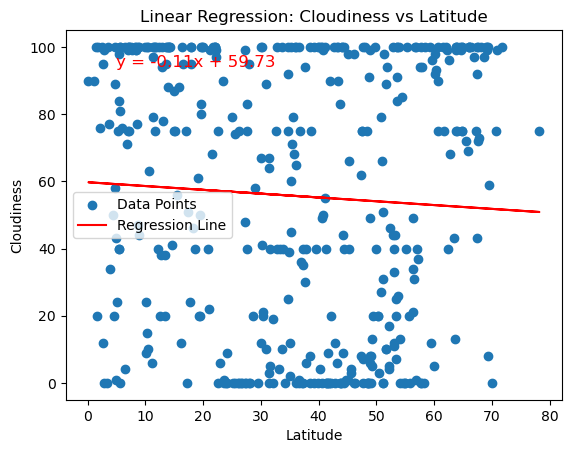

The r^2-value is: -0.056472916289759964


(-0.11328422013882097,
 59.7284106981875,
 -0.056472916289759964,
 0.2533260346202114,
 0.09903162815759498)

In [86]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_data['Lat'], northern_hemisphere_data['Cloudiness'], 'Latitude', 'Cloudiness')

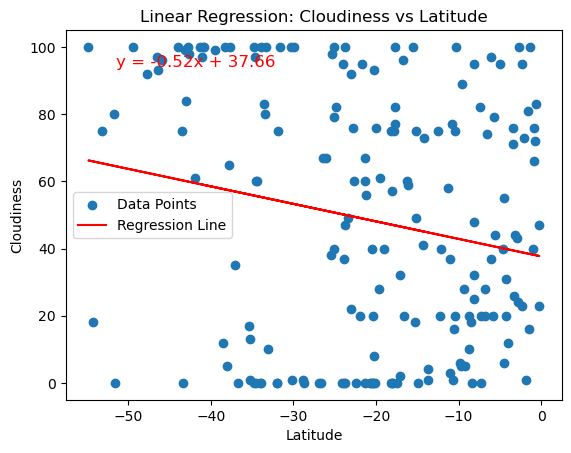

The r^2-value is: -0.19503048969885003


(-0.5212155537570466,
 37.655843968106204,
 -0.19503048969885003,
 0.007639606622427672,
 0.19323471584983154)

In [87]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_data['Lat'], southern_hemisphere_data['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 
The graphs and r value would indicate that the comparison of cloudiness to latitude has no correlation. Both r values are well below .1. This would indicate that clouds can appear at any part of the globe regardless of the cities relation to the 0 latitude line. 

### Wind Speed vs. Latitude Linear Regression Plot

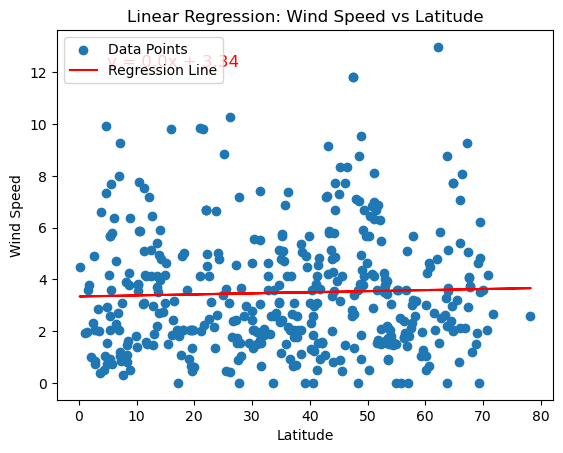

The r^2-value is: 0.03496710430291112


(0.004118405003951764,
 3.3390169225887556,
 0.03496710430291112,
 0.47959753937586713,
 0.005820255660445537)

In [88]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_data['Lat'], northern_hemisphere_data['Wind Speed'], 'Latitude', 'Wind Speed')

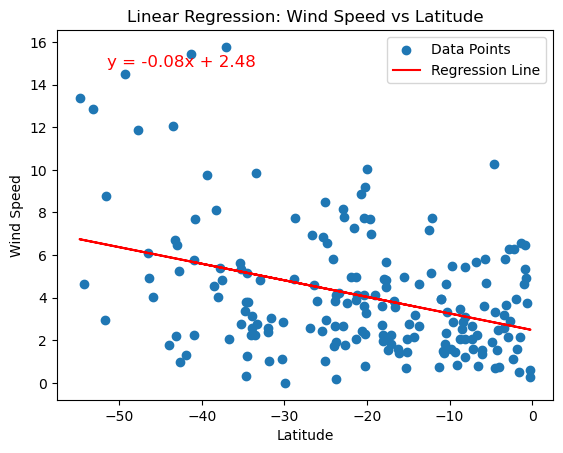

The r^2-value is: -0.3672941928216674


(-0.07779660729582114,
 2.481764185289631,
 -0.3672941928216674,
 2.511448284129581e-07,
 0.014523442825346228)

In [89]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_data['Lat'], southern_hemisphere_data['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 
Once again, the r value is showing that a linear regression does not appear to be applicable to the data comparing wind speed to latitude. The R values are both under .1 which indicates a very poor correlation to the data. Wind speed in a specific location does not appear to be impacted by the locations relation to the 0 latitude line. 